## Measures - Experiments

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.ocel.importer.xmlocel import importer as xmlocel_importer


In [2]:
# import game ocels 
ocel_game1 = xmlocel_importer.apply("output_logs/game.xmlocel")
#ocel_game2 = xmlocel_importer.apply("output_logs/game2.xmlocel")


In [3]:
ocel_extended_table_game1 = ocel_game1.get_extended_table()
#ocel_extended_table_game1 = ocel_extended_table_game1.sort_values("ocel:timestamp")
#ocel_extended_table_game2 = ocel_game2.get_extended_table()

ocel_extended_table_game1
#ocel_extended_table_game2 = ocel_game2.get_extended_table()

ocel_extended_table_game1

,ocel:eid,ocel:activity,ocel:timestamp,attribute:subtype,attribute:duration,attribute:crossed_grid,attribute:attack_game,attribute:attack_successful,attribute:home_team_score,attribute:away_team_score,...,attribute:start_y,attribute:end_x,attribute:end_y,attribute:travel_distance,attribute:start_grid,ocel:type:Team,ocel:type:Player,ocel:type:case:concept:name,ocel:type:ball,ocel:type:end_grid
0,0,SET PIECE-KICK OFF,1970-01-01 00:00:00+00:00,KICK OFF,-0.04,True,1,False,0,0,...,NaN,NaN,NaN,NaN,NaN,[Away],[Player19],[AA1],[ball_1],NaN
1,1,PASS Out,1970-01-01 00:00:00+00:00,NaN,0.08,True,1,False,0,0,...,0.39,0.55000,0.43000,0.107703,C2,[Away],[Player19],[AA1],[ball_1],[D2]
2,2,Player changes position,1970-01-01 00:00:00+00:00,NaN,NaN,NaN,1,False,0,0,...,NaN,0.52697,0.37980,NaN,NaN,[Home],[Player9],[AA1],NaN,[D2]
3,3,Player changes position,1970-01-01 00:00:00+00:00,NaN,NaN,NaN,1,False,0,0,...,NaN,0.55243,0.43269,NaN,NaN,[Home],[Player10],[AA1],NaN,[D2]
4,4,Player changes position,1970-01-01 00:00:00+00:00,NaN,NaN,NaN,1,False,0,0,...,NaN,0.58393,0.20794,NaN,NaN,[Away],[Player15],[AA1],NaN,[D1]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18516,18516,Player changes position,1970-01-01 01:36:35+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.33270,0.63418,NaN,C3,[Home],[Player3],[AA175],NaN,[B3]
18517,18517,Player changes position,1970-01-01 01:36:39+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.29972,0.49964,NaN,B3,[Away],[Player23],[AA175],NaN,[B2]
18518,18518,Player changes position,1970-01-01 01:36:39+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.33351,0.65372,NaN,B3,[Home],[Player13],[AA175],NaN,[C3]
18519,18519,Player changes position,1970-01-01 01:36:40+00:00,NaN,NaN,NaN,355,False,4,0,...,NaN,0.16673,0.76740,NaN,A4,[Home],[Player9],[AA175],NaN,[B4]


In [4]:
print("unique activities in game1:", ocel_extended_table_game1['ocel:activity'].unique())

unique activities in game1: ['SET PIECE-KICK OFF' 'PASS Out' 'Player changes position' 'PASS Received'
 'BALL LOST-INTERCEPTION' 'RECOVERY-INTERCEPTION'
 'BALL LOST-HEAD-INTERCEPTION' 'CHALLENGE-AERIAL-LOST'
 'CHALLENGE-AERIAL-WON' 'BALL OUT' 'SET PIECE-CORNER KICK'
 'SHOT-HEAD-ON TARGET-GOAL' 'SET PIECE-THROW IN' 'BALL LOST' 'RECOVERY'
 'CHALLENGE-GROUND-LOST' 'CHALLENGE-GROUND-WON' 'CHALLENGE-TACKLE-WON'
 'RECOVERY-THEFT' 'CHALLENGE-TACKLE-LOST' 'BALL LOST-THEFT'
 'SHOT-OFF TARGET-OUT' 'BALL LOST-HEAD' 'BALL LOST-CROSS-INTERCEPTION'
 'BALL LOST-GOAL KICK-INTERCEPTION' 'SHOT-ON TARGET-SAVED'
 'RECOVERY-SAVED' 'BALL LOST-HEAD-FORCED' 'CHALLENGE-AERIAL-FAULT-WON'
 'CHALLENGE-AERIAL-FAULT-LOST' 'SET PIECE-FREE KICK'
 'BALL OUT-HEAD-CLEARANCE' 'BALL OUT-CLEARANCE'
 'CHALLENGE-GROUND-FAULT-LOST' 'FAULT RECEIVED'
 'CHALLENGE-GROUND-FAULT-WON' 'BALL OUT-HEAD' 'SHOT-HEAD-OFF TARGET-OUT'
 'CHALLENGE-DRIBBLE-WON' 'BALL LOST-OFFSIDE' 'CHALLENGE-TACKLE-FAULT-LOST'
 'CHALLENGE-TACKLE-FAULT-WON' 'C

In [5]:
# turn fields into single string values instead of a list of a string value
ocel_extended_table_game1["ocel:type:case:concept:name"] = ocel_extended_table_game1["ocel:type:case:concept:name"].apply(lambda x: x[0] if isinstance(x, list) else x)
ocel_extended_table_game1["ocel:type:Team"] = ocel_extended_table_game1["ocel:type:Team"].apply(lambda x: x[0] if isinstance(x, list) else x)

#ocel_extended_table_game2["ocel:type:case:concept:name"] = ocel_extended_table_game2["ocel:type:case:concept:name"].apply(lambda x: x[0] if isinstance(x, list) else x)
#ocel_extended_table_game2["ocel:type:Team"] = ocel_extended_table_game2["ocel:type:Team"].apply(lambda x: x[0] if isinstance(x, list) else x)


# separate the rows for away and home teams possessions (but including both teams events during that time)
rows_possessions_away = ocel_extended_table_game1[ocel_extended_table_game1["ocel:type:case:concept:name"].str.startswith("AA")]
rows_possessions_home = ocel_extended_table_game1[ocel_extended_table_game1["ocel:type:case:concept:name"].str.startswith("HA")]

# group by possessions
possessions_away = rows_possessions_away.groupby("ocel:type:case:concept:name")
possessions_home = rows_possessions_home.groupby("ocel:type:case:concept:name")


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def basic_count_analysis(away_counts, home_counts):
    # Convert to DataFrame and add a label column
    away_df = pd.DataFrame({'event_count': away_counts, 'team': 'Away'})
    home_df = pd.DataFrame({'event_count': home_counts, 'team': 'Home'})

    # Combine into one DataFrame
    combined_df = pd.concat([away_df, home_df]).reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    sns.histplot(data=combined_df, x='event_count', hue='team', kde=True, element='step', stat='density', common_norm=False)
    plt.title("Distribution of Event Counts per Possession (Home vs Away)")
    plt.xlabel("Number of Events in Possession")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=combined_df, x='team', y='event_count')
    plt.title("Event Count Distribution per Possession")
    plt.ylabel("Number of Events")
    plt.xlabel("Team")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Perform Mann–Whitney U test (two-sided)
    stat, p_value = mannwhitneyu(away_counts, home_counts, alternative='two-sided')

    # Show result
    print(f"Mann–Whitney U test statistic: {stat}")
    print(f"P-value: {p_value:.4f}")


## Total no. of events during possessions

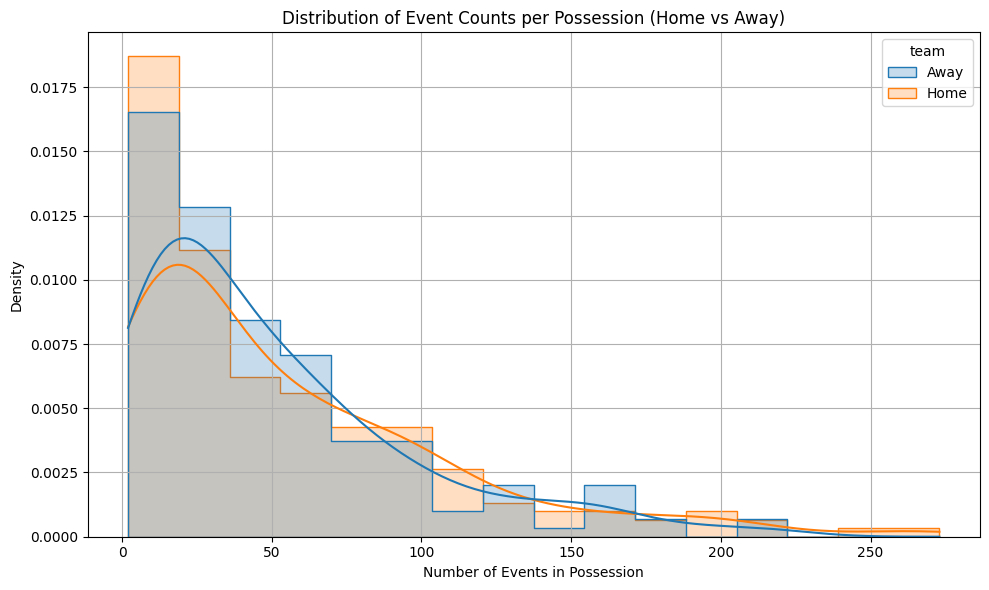

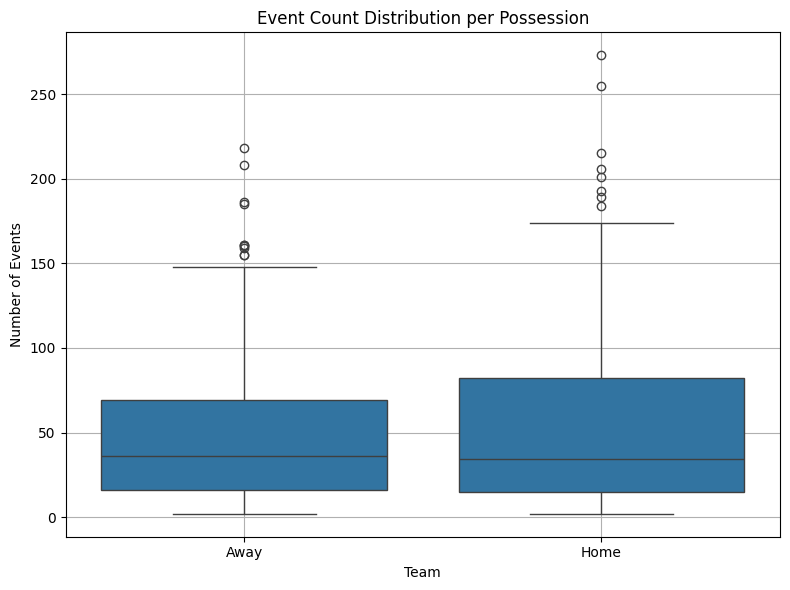

Mann–Whitney U test statistic: 15619.0
P-value: 0.8926


In [7]:
# Count the number of events in each possession
# this includes all the events of both teams during the possession (so also how the other team moves)
away_counts = possessions_away.size()
home_counts = possessions_home.size()
basic_count_analysis(away_counts, home_counts)

## No. of events of the possessions team during possessions

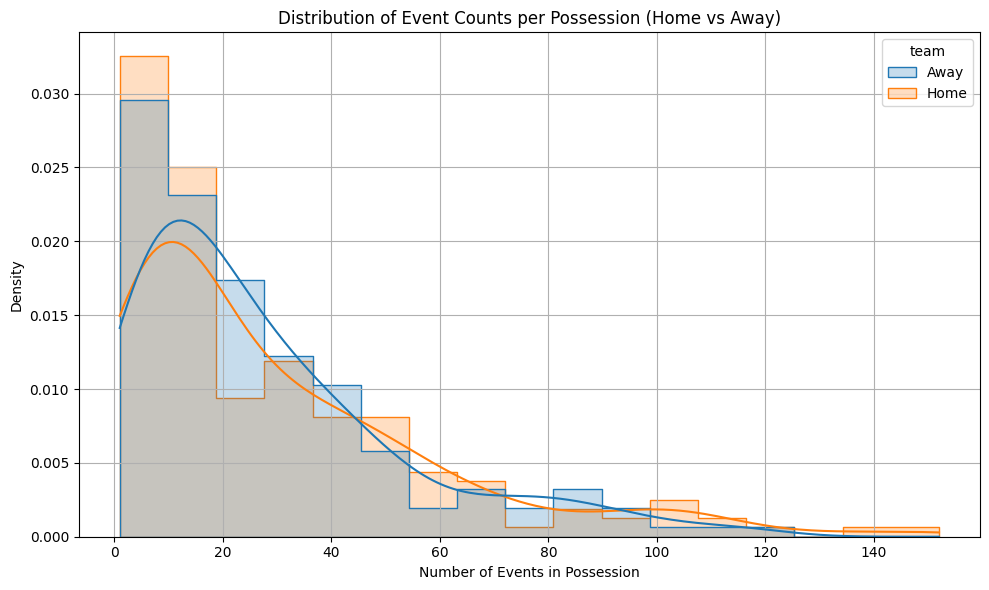

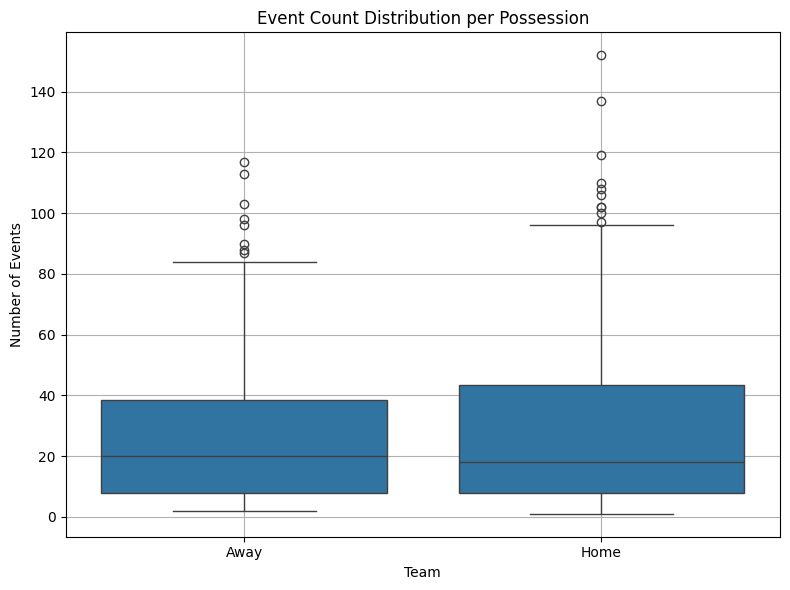

Mann–Whitney U test statistic: 15920.5
P-value: 0.8603


In [8]:
# separate the rows for away and home teams possessions and only their own events
rows_possessions_away_team_away = rows_possessions_away[rows_possessions_away["ocel:type:Team"] == "Away"]
rows_possessions_home_team_home = rows_possessions_home[rows_possessions_home["ocel:type:Team"] == "Home"]

# group by possessions
possessions_away_team_away = rows_possessions_away_team_away.groupby("ocel:type:case:concept:name")
possessions_home_team_home = rows_possessions_home_team_home.groupby("ocel:type:case:concept:name")

# Count the number of events in each possession that belongs to the team that has the possession
away_counts = possessions_away_team_away.size()
home_counts = possessions_home_team_home.size()
basic_count_analysis(away_counts, home_counts)

## How many events for traces with shot?

### Total no. of events during shot possessions

No. of possessions with shot AWAY:  6
No. of possessions with shot HOME:  18


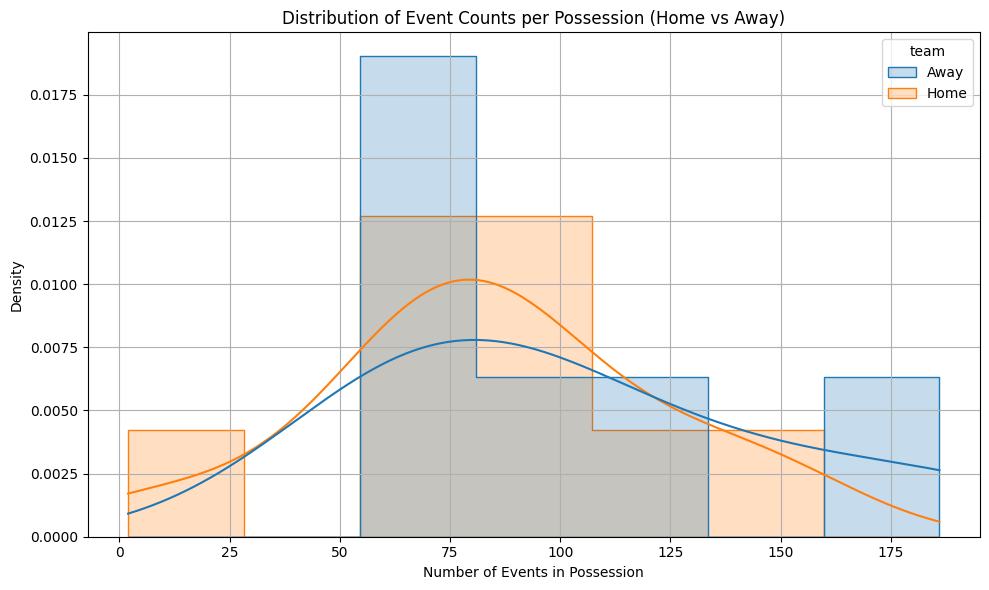

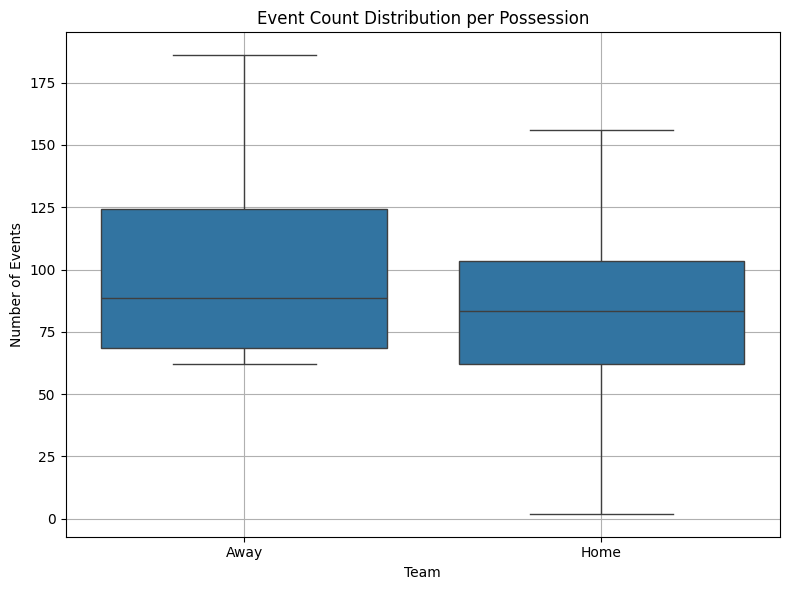

Mann–Whitney U test statistic: 64.0
P-value: 0.5262


In [9]:
# filter for those possessions that have a shot activity
possessions_away_with_shot = possessions_away.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_away_with_shot = possessions_away_with_shot.groupby("ocel:type:case:concept:name")
print("No. of possessions with shot AWAY: ", possessions_away_with_shot.ngroups)

possessions_home_with_shot = possessions_home.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_home_with_shot = possessions_home_with_shot.groupby("ocel:type:case:concept:name")
print("No. of possessions with shot HOME: ", possessions_home_with_shot.ngroups)

# This includes all the events of both teams during the possession (so also how the other team moves)
away_counts = possessions_away_with_shot.size()
home_counts = possessions_home_with_shot.size()
basic_count_analysis(away_counts, home_counts)


### Shot teams no. of events during possessions

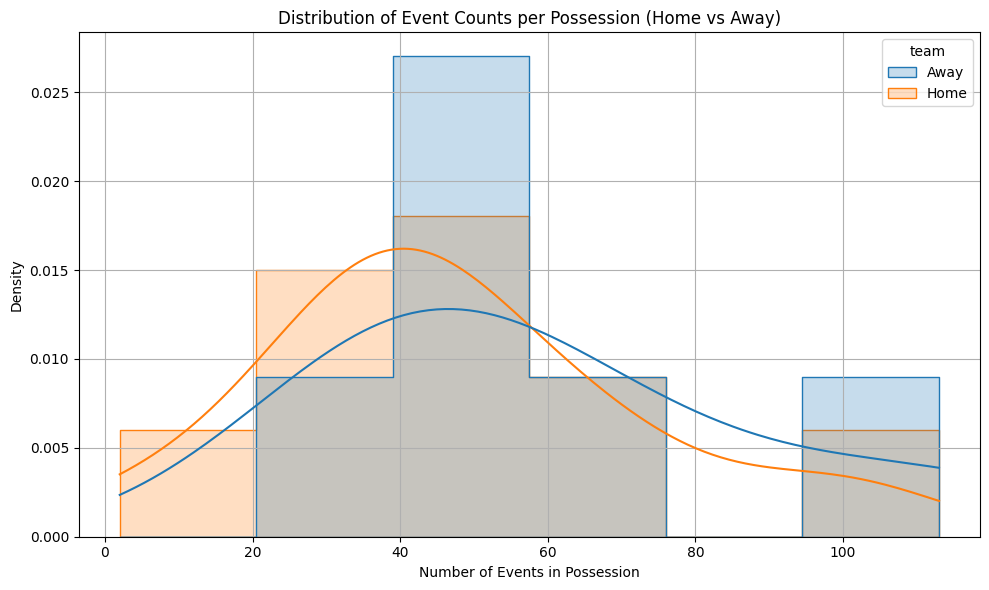

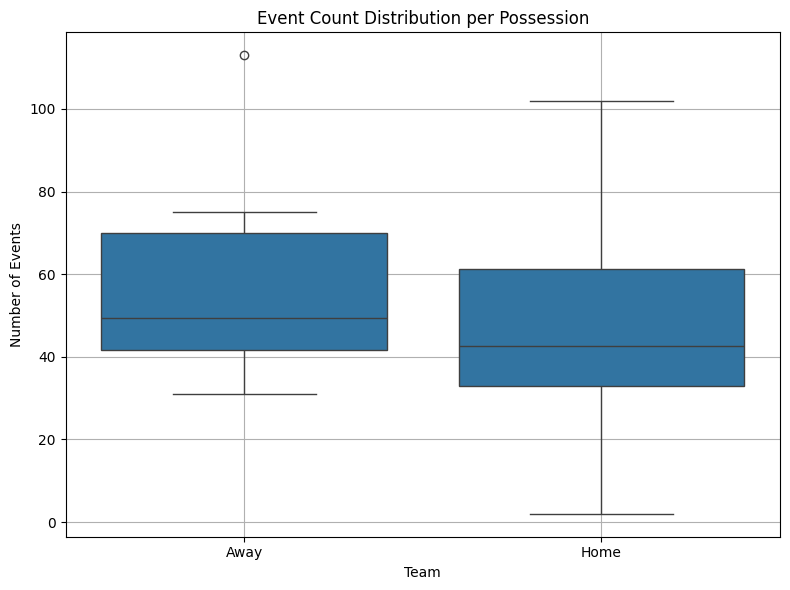

Mann–Whitney U test statistic: 68.0
P-value: 0.3677


In [10]:
# This includes only the events of the team that has the possession
# filter for those possessions that have a shot activity
possessions_away_team_away_with_shot = possessions_away_team_away.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_away_team_away_with_shot = possessions_away_team_away_with_shot.groupby("ocel:type:case:concept:name")

possessions_home_team_home_with_shot = possessions_home_team_home.filter(lambda x: any(str(act).startswith("SHOT") for act in x['ocel:activity'].values))
possessions_home_team_home_with_shot = possessions_home_team_home_with_shot.groupby("ocel:type:case:concept:name")

# This includes only the events of the team that has the possession
away_counts = possessions_away_team_away_with_shot.size()
home_counts = possessions_home_team_home_with_shot.size()
basic_count_analysis(away_counts, home_counts)

In [11]:
away_possessions_with_shot_groupIDs = list(possessions_away_team_away_with_shot.groups.keys())
print("Available possession group names (Away team, with shot):")
print(away_possessions_with_shot_groupIDs)

Available possession group names (Away team, with shot):
['AA103', 'AA138', 'AA156', 'AA16', 'AA166', 'AA36']


In [77]:
groupId = "AA156"

possessionWithShot = possessions_away_team_away_with_shot.get_group(groupId)
possessionWithShot_events = possessionWithShot[possessionWithShot['ocel:activity'] != "Player changes position"]['ocel:activity'].values
print("Events in possession (Away Team) excluding 'Player changes position':")
for event in possessionWithShot_events:
    print(event)

Events in possession (Away Team) excluding 'Player changes position':
RECOVERY-INTERCEPTION
PASS Out
PASS Received
PASS Out
PASS Received
PASS Out
PASS Received
PASS Out
PASS Received
PASS Out
PASS Received
PASS Out
PASS Received
SHOT-OFF TARGET-OUT


In [78]:
def get_change_position_count_of_shot_player(groupId, possessions):
    shot_event_possession = possessions.get_group(groupId)
    shot_event = shot_event_possession[shot_event_possession['ocel:activity'].apply(lambda act: str(act).startswith('SHOT'))]
    # Get the player who performed the shot
    player = shot_event["ocel:type:Player"].values[0]
    #print("Player who performed the shot:", player)
    # Get all activities in group performed by the player who took the shot
    player_id = player[0]
    group = possessions.get_group(groupId)
    player_activities = group[group["ocel:type:Player"].apply(lambda x: player_id in x)]["ocel:activity"].values
    change_position_count = (player_activities == "Player changes position").sum()
    #print(f"Number of 'Player changes position' activities for {player_id}: {change_position_count}")
    return change_position_count
    #print(f"All activities in group by {player_id}:")
    #for act in player_activities:
    #    print(act)

In [79]:
home_possessions_with_shot_groupIDs = list(possessions_home_team_home_with_shot.groups.keys())
print("Available possession group names (Home team, with shot):")
print(home_possessions_with_shot_groupIDs)

#possessionWithShot = possessions_home_team_home_with_shot.get_group("HA4")
#possessionWithShot_events = possessionWithShot[possessionWithShot['ocel:activity'] != "Player changes position"]['ocel:activity'].values
#print("Events in possession (Home Team) excluding 'Player changes position':")
#for event in possessionWithShot_events:
#    print(event)

Available possession group names (Home team, with shot):
['HA106', 'HA11', 'HA121', 'HA132', 'HA133', 'HA156', 'HA160', 'HA173', 'HA19', 'HA32', 'HA4', 'HA46', 'HA53', 'HA77', 'HA78', 'HA84', 'HA88', 'HA95']


## Shot players no. of position changes

Away team shot player 'Player changes position' activity counts:
[np.int64(5), np.int64(3), np.int64(2), np.int64(2), np.int64(6), np.int64(4)]
Home team shot player 'Player changes position' activity counts:
[np.int64(3), np.int64(8), np.int64(9), np.int64(2), np.int64(5), np.int64(2), np.int64(3), np.int64(7), np.int64(4), np.int64(2), np.int64(15), np.int64(4), np.int64(3), np.int64(3), np.int64(0), np.int64(6), np.int64(1), np.int64(4)]


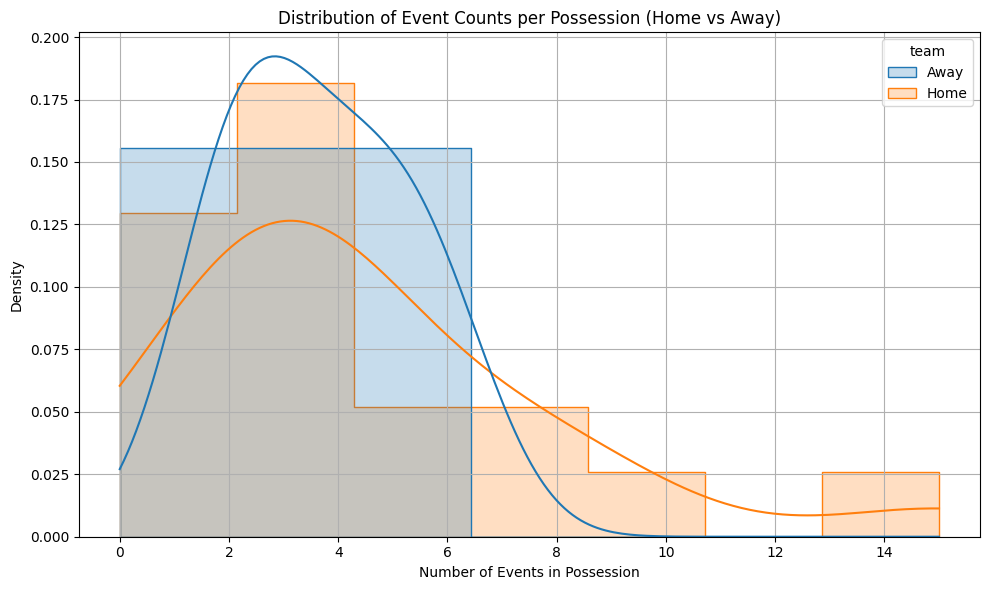

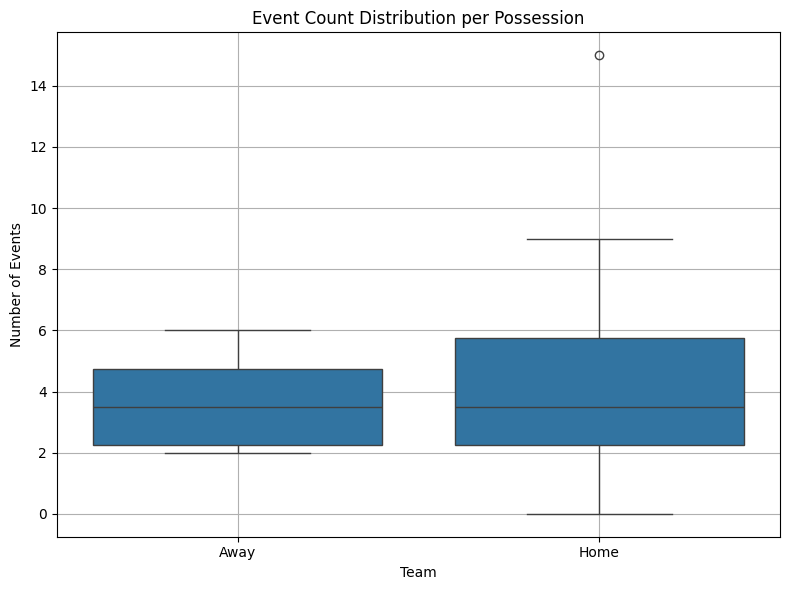

Mann–Whitney U test statistic: 50.5
P-value: 0.8397


In [80]:
away_shot_player_activity_counts = [get_change_position_count_of_shot_player(gid, possessions_away_team_away_with_shot) for gid in away_possessions_with_shot_groupIDs]
print("Away team shot player 'Player changes position' activity counts:")
print(away_shot_player_activity_counts)

home_shot_player_activity_counts = [get_change_position_count_of_shot_player(gid, possessions_home_team_home_with_shot) for gid in home_possessions_with_shot_groupIDs]
print("Home team shot player 'Player changes position' activity counts:")
print(home_shot_player_activity_counts)

basic_count_analysis(away_shot_player_activity_counts, home_shot_player_activity_counts)

/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13/site-packages/pm4py/objects/ocel/util/extended_table.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df[internal_index] = events_df.index
/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13/site-packages/pm4py/objects/ocel/util/extended_table.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_df.sort_values([event_timestamp, internal_index], inplace=True)
importing OCEL, parsed rows :: 100%|██████████| 55/55 [00:00<00:00, 16591.39it/s]
/Users/paul/miniconda3/envs/pm4py-env/lib/python3.13

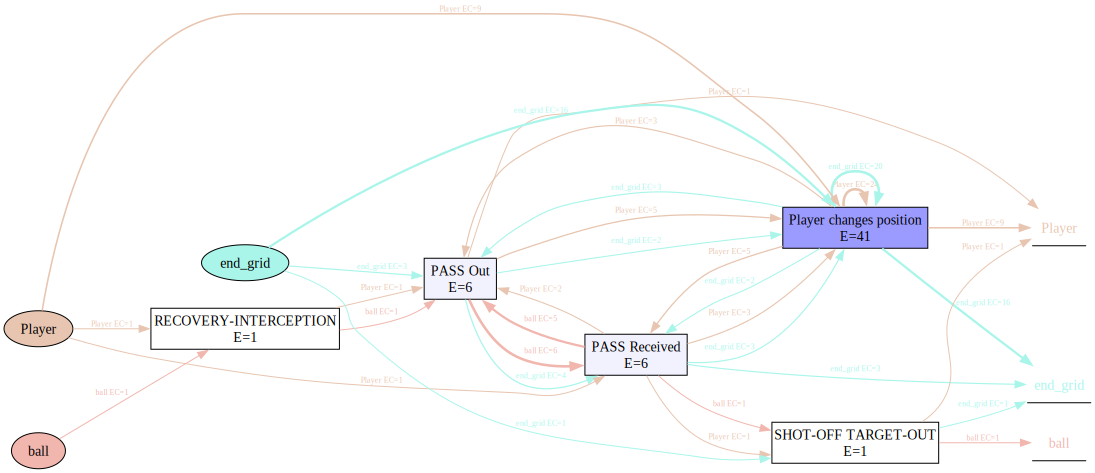

In [100]:
from pm4py.objects.ocel.importer.csv import importer as csv_importer

#['AA103', 'AA138', 'AA156', 'AA16', 'AA166', 'AA36']

groupId = "AA156"

possessions_away_team_away_with_shot.get_group(groupId).to_csv("possessions_away_team_away_with_shot.csv", index=False)

ocel_filtered = csv_importer.apply("possessions_away_team_away_with_shot.csv")

#pm4py.write_ocel(ocel_filtered, "output_logs/possessions_away_team_away_with_shot.xmlocel")

dfg=pm4py.ocel.discover_ocdfg(ocel_filtered)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [121]:
####################################
# GET BALL MOVEMENT DURING THE POSSESSION
ball_rows = possessions_away_team_away_with_shot.get_group(groupId)[possessions_away_team_away_with_shot.get_group(groupId)["ocel:activity"] != "Player changes position"]
# extract the balls movement during the possession
ball_movement = ball_rows["attribute:start_grid"]
# Convert string representation of list to actual list and extract the value
print("ball movement:", ball_movement)
ball_movement_grid_cells = ball_movement.tolist()
ball_movement_activities = ball_rows["ocel:activity"].tolist()

# Filter out "PASS Received" activities and their corresponding grid cells
mask = ball_rows["ocel:activity"] != "PASS Received"
ball_movement_grid_cells = ball_movement[mask].tolist()
ball_movement_activities = ball_rows["ocel:activity"][mask].tolist()

print("ball movement:", ball_movement_grid_cells)
print("ball movement activities:", ball_movement_activities)
# Enumerate the ball movement activities
# Replace "PASS Out" with "PASS" in ball_movement_activities
ball_movement_activities = [act.replace("PASS Out", "PASS") for act in ball_movement_activities]
ball_movement_activities = [f"{i+1}. {act}" for i, act in enumerate(ball_movement_activities)]
print("ball movement activities enumerated:", ball_movement_activities)

####################################
# GET PLAYER MOVEMENTS DURING THE POSSESSION
player_rows = possessions_away_team_away_with_shot.get_group(groupId)[possessions_away_team_away_with_shot.get_group(groupId)["ocel:activity"] == "Player changes position"]
# Group player_rows by player (note: player is a list like [Player17], so use the first element)
player_groups = player_rows.groupby(player_rows["ocel:type:Player"].apply(lambda x: x[0] if isinstance(x, list) else x))
for player_id, group in player_groups:
    print(f"Player: {player_id}")
    # Unpack end_grid values from lists like [D5] to D5
    unpacked_end_grids = group["ocel:type:end_grid"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
    print(unpacked_end_grids)
    print("-" * 40)

player_end_grid_dict = {
    player_id: group["ocel:type:end_grid"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x).tolist()
    for player_id, group in player_groups
}
print(player_end_grid_dict)

ball movement: 15892    B3
15893    B3
15897    B4
15909    B4
15911    B3
15917    B3
15926    D1
15939    D1
15941    D1
15945    D1
15958    E1
15984    F2
15987    F2
15988    F2
Name: attribute:start_grid, dtype: object
ball movement: ['B3', 'B3', 'B4', 'B3', 'D1', 'D1', 'F2', 'F2']
ball movement activities: ['RECOVERY-INTERCEPTION', 'PASS Out', 'PASS Out', 'PASS Out', 'PASS Out', 'PASS Out', 'PASS Out', 'SHOT-OFF TARGET-OUT']
ball movement activities enumerated: ['1. RECOVERY-INTERCEPTION', '2. PASS', '3. PASS', '4. PASS', '5. PASS', '6. PASS', '7. PASS', '8. SHOT-OFF TARGET-OUT']
Player: Player15
15943    C3
15978    D3
Name: ocel:type:end_grid, dtype: object
----------------------------------------
Player: Player16
15902    B3
15920    B2
15938    C2
15981    C3
15986    D3
Name: ocel:type:end_grid, dtype: object
----------------------------------------
Player: Player17
15895    B4
15908    B3
15913    B4
15923    C4
15946    D4
15963    D3
15969    E3
Name: ocel:type:end_grid,

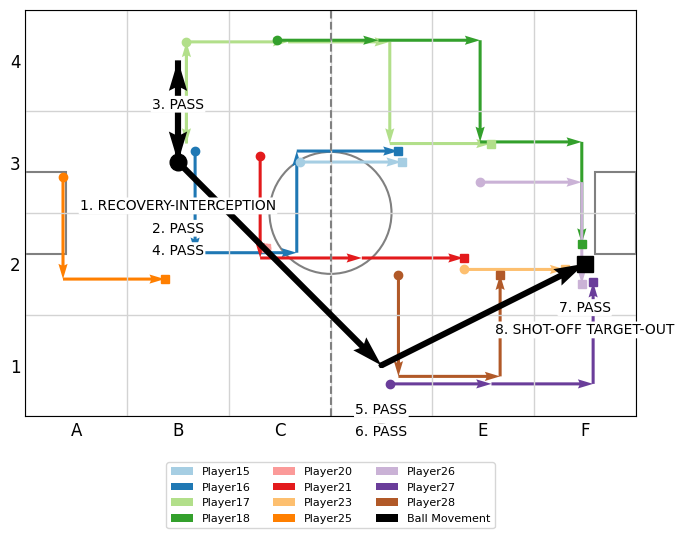

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

# Convert grid cell name to center coordinates (A1 is bottom-left)
def cell_to_coords(cell):
    col_letter = cell[0].upper()
    row_number = int(cell[1:]) - 1
    col_number = string.ascii_uppercase.index(col_letter)
    return (col_number + 0.5, row_number + 0.5)


colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#b15928']

fig, ax = plt.subplots(figsize=(7, 7))

cols = 6  # A-F
rows = 4  # 1-4

# Draw grid lines
for i in range(cols + 1):
    ax.plot([i, i], [0, rows], color='lightgray', linewidth=1)
for j in range(rows + 1):
    ax.plot([0, cols], [j, j], color='lightgray', linewidth=1)

# Set axis limits
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

# Set axis ticks to be at cell edges (so labels appear centered on cells)
ax.set_xticks(np.arange(cols) + 0.5)
ax.set_yticks(np.arange(rows) + 0.5)

# Set tick labels: x-axis letters A-F
ax.set_xticklabels(list(string.ascii_uppercase[:cols]), fontsize=12)
# y-axis numbers 1-4 (bottom to top)
ax.set_yticklabels([str(i) for i in range(1, rows + 1)], fontsize=12)

# Remove minor ticks and grid
ax.tick_params(axis='both', which='both', length=0)  # no tick marks

# Draw soccer field elements (unchanged)
ax.plot([3, 3], [0, rows], color='gray', linestyle='--', linewidth=1.5)
center_circle = plt.Circle((3, 2), 0.6, color='gray', fill=False, linewidth=1.5)
ax.add_patch(center_circle)
left_goal_area = plt.Rectangle((0, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(left_goal_area)
right_goal_area = plt.Rectangle((5.6, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(right_goal_area)

# Draw paths with slight offsets (unchanged)
offset_magnitude = 0.2
angle_step = 2 * np.pi / len(paths)

# Example: player_paths = {'Player17': ['B3', 'B4', 'C4', ...], ...}
for i, (player, path) in enumerate(player_end_grid_dict.items()):
    coords = [cell_to_coords(cell) for cell in path]
    angle = i * angle_step
    dx = offset_magnitude * np.cos(angle)
    dy = offset_magnitude * np.sin(angle)
    coords = [(x + dx, y + dy) for (x, y) in coords]
    X, Y = zip(*coords)
    U = np.diff(X)
    V = np.diff(Y)
    X_start = X[:-1]
    Y_start = Y[:-1]
    ax.quiver(X_start, Y_start, U, V, angles='xy', scale_units='xy', scale=1,
              color=colors[i], width=0.005, label=player)
    ax.plot(X[0], Y[0], 'o', color=colors[i], markersize=6)
    ax.plot(X[-1], Y[-1], 's', color=colors[i], markersize=6)


####################################
# Ball movement plotting part
ball_path = ball_movement_grid_cells
ball_coords = [cell_to_coords(cell) for cell in ball_path]
Xb, Yb = zip(*ball_coords)
Ub = np.diff(Xb)
Vb = np.diff(Yb)

Xb_start = Xb[:-1]
Yb_start = Yb[:-1]

ax.quiver(Xb_start, Yb_start, Ub, Vb, angles='xy', scale_units='xy', scale=1,
          color='black', width=0.01, label='Ball Movement', zorder=10)


offset_base = 0.5  # base vertical offset
label_spacing = 0.22  # vertical spacing between stacked labels

# Keep track of how many labels per (x,y) cell center
label_counts = {}

for i in range(len(ball_path)):
    start_x = Xb[i]
    start_y = Yb[i]
    label = ball_movement_activities[i]
    
    # Key for this position rounded to a grid center (avoid floating issues)
    key = (round(start_x, 3), round(start_y, 3))
    
    # Count how many labels already here
    count = label_counts.get(key, 0)
    label_counts[key] = count + 1
    
    # Calculate vertical offset based on count
    y_offset = offset_base + count * label_spacing
    
    ax.text(start_x, start_y - y_offset, label, fontsize=10, color='black',
            ha='center', va='bottom',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'), zorder=11)


ax.plot(Xb[0], Yb[0], 'o', color='black', markersize=12)   # Start marker
ax.plot(Xb[-1], Yb[-1], 's', color='black', markersize=12) # End marker
####################################


ax.set_aspect('equal')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=8)

plt.tight_layout()
plt.savefig("spatialView_withPlayers.png", dpi=300)
plt.show()


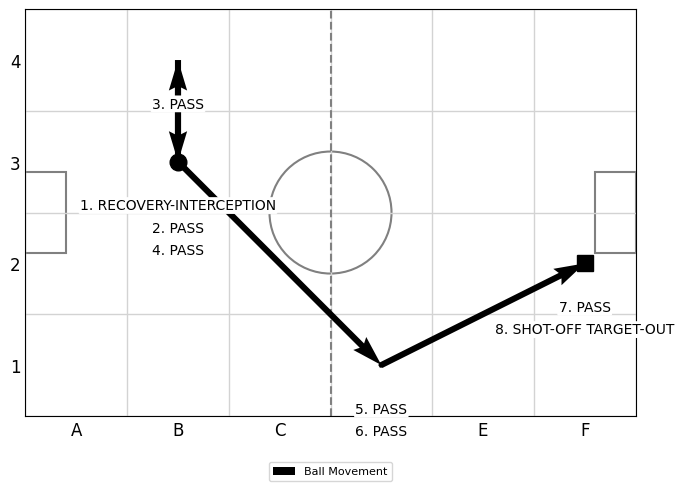

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

# Convert grid cell name to center coordinates (A1 is bottom-left)
def cell_to_coords(cell):
    col_letter = cell[0].upper()
    row_number = int(cell[1:]) - 1
    col_number = string.ascii_uppercase.index(col_letter)
    return (col_number + 0.5, row_number + 0.5)


colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#b15928']

fig, ax = plt.subplots(figsize=(7, 7))

cols = 6  # A-F
rows = 4  # 1-4

# Draw grid lines
for i in range(cols + 1):
    ax.plot([i, i], [0, rows], color='lightgray', linewidth=1)
for j in range(rows + 1):
    ax.plot([0, cols], [j, j], color='lightgray', linewidth=1)

# Set axis limits
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

# Set axis ticks to be at cell edges (so labels appear centered on cells)
ax.set_xticks(np.arange(cols) + 0.5)
ax.set_yticks(np.arange(rows) + 0.5)

# Set tick labels: x-axis letters A-F
ax.set_xticklabels(list(string.ascii_uppercase[:cols]), fontsize=12)
# y-axis numbers 1-4 (bottom to top)
ax.set_yticklabels([str(i) for i in range(1, rows + 1)], fontsize=12)

# Remove minor ticks and grid
ax.tick_params(axis='both', which='both', length=0)  # no tick marks

# Draw soccer field elements (unchanged)
ax.plot([3, 3], [0, rows], color='gray', linestyle='--', linewidth=1.5)
center_circle = plt.Circle((3, 2), 0.6, color='gray', fill=False, linewidth=1.5)
ax.add_patch(center_circle)
left_goal_area = plt.Rectangle((0, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(left_goal_area)
right_goal_area = plt.Rectangle((5.6, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(right_goal_area)

####################################
# Ball movement plotting part
ball_path = ball_movement_grid_cells
ball_coords = [cell_to_coords(cell) for cell in ball_path]
Xb, Yb = zip(*ball_coords)
Ub = np.diff(Xb)
Vb = np.diff(Yb)

Xb_start = Xb[:-1]
Yb_start = Yb[:-1]

ax.quiver(Xb_start, Yb_start, Ub, Vb, angles='xy', scale_units='xy', scale=1,
          color='black', width=0.01, label='Ball Movement', zorder=10)


offset_base = 0.5  # base vertical offset
label_spacing = 0.22  # vertical spacing between stacked labels

# Keep track of how many labels per (x,y) cell center
label_counts = {}

for i in range(len(ball_path)):
    start_x = Xb[i]
    start_y = Yb[i]
    
    label = ball_movement_activities[i]
    
    # Key for this position rounded to a grid center (avoid floating issues)
    key = (round(start_x, 3), round(start_y, 3))
    
    # Count how many labels already here
    count = label_counts.get(key, 0)
    label_counts[key] = count + 1
    
    # Calculate vertical offset based on count
    y_offset = offset_base + count * label_spacing
    
    ax.text(start_x, start_y - y_offset, label, fontsize=10, color='black',
            ha='center', va='bottom',
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.1'), zorder=11)


ax.plot(Xb[0], Yb[0], 'o', color='black', markersize=12)   # Start marker
ax.plot(Xb[-1], Yb[-1], 's', color='black', markersize=12) # End marker
####################################


ax.set_aspect('equal')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=8)

plt.tight_layout()
plt.savefig("spatialView_withoutPlayers.png", dpi=300)
plt.show()


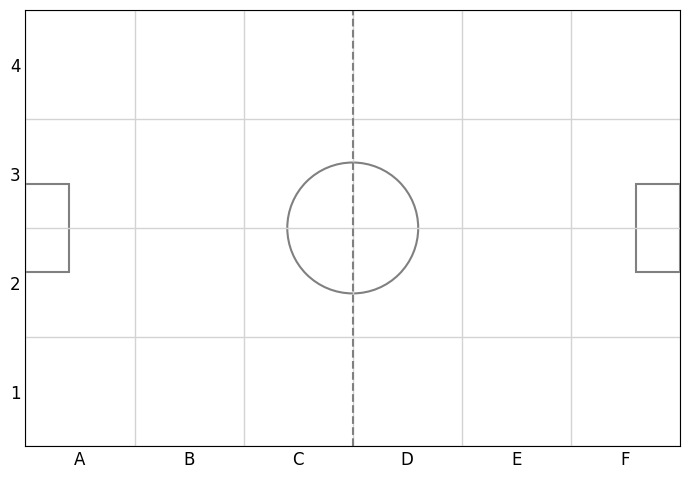

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import string
import matplotlib.cm as cm

# Convert grid cell name to center coordinates (A1 is bottom-left)
def cell_to_coords(cell):
    col_letter = cell[0].upper()
    row_number = int(cell[1:]) - 1
    col_number = string.ascii_uppercase.index(col_letter)
    return (col_number + 0.5, row_number + 0.5)


colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#b15928']

fig, ax = plt.subplots(figsize=(7, 7))

cols = 6  # A-F
rows = 4  # 1-4

# Draw grid lines
for i in range(cols + 1):
    ax.plot([i, i], [0, rows], color='lightgray', linewidth=1)
for j in range(rows + 1):
    ax.plot([0, cols], [j, j], color='lightgray', linewidth=1)

# Set axis limits
ax.set_xlim(0, cols)
ax.set_ylim(0, rows)

# Set axis ticks to be at cell edges (so labels appear centered on cells)
ax.set_xticks(np.arange(cols) + 0.5)
ax.set_yticks(np.arange(rows) + 0.5)

# Set tick labels: x-axis letters A-F
ax.set_xticklabels(list(string.ascii_uppercase[:cols]), fontsize=12)
# y-axis numbers 1-4 (bottom to top)
ax.set_yticklabels([str(i) for i in range(1, rows + 1)], fontsize=12)

# Remove minor ticks and grid
ax.tick_params(axis='both', which='both', length=0)  # no tick marks

# Draw soccer field elements (unchanged)
ax.plot([3, 3], [0, rows], color='gray', linestyle='--', linewidth=1.5)
center_circle = plt.Circle((3, 2), 0.6, color='gray', fill=False, linewidth=1.5)
ax.add_patch(center_circle)
left_goal_area = plt.Rectangle((0, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(left_goal_area)
right_goal_area = plt.Rectangle((5.6, 1.6), 0.4, 0.8, edgecolor='gray', facecolor='none', linewidth=1.5)
ax.add_patch(right_goal_area)

####################################


####################################


ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("spatialView_empty.png", dpi=300)
plt.show()
